# Loader + KDE

In [1]:
import sys
sys.path.append('../codes')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import pylab as plt

from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### 1. Load justin beer data

Filtering parameters taken from https://www.dropbox.com/home/Meta_clustering/ms2lda/large_study/r/config?preview=config_beer_pos_3.yml for the beer data.
- rt_start: 3*60
- rt_end: 21*60
- min_MS1_intensity : 1E5 or 2E5 should do a decent job on Polyomics Q-Exactive data
- min_MS2_intensity: 5000

In [5]:
min_ms1_intensity = 2.5E5
min_ms2_intensity = 5000
min_rt = 3*60
max_rt = 21*60

Load mzML files

In [6]:
ds = DataSource()

In [7]:
mzml_path = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Data\\multibeers_urine_data\\beers\\fragmentation'
ds.load_data(mzml_path)

Get all the filenames we've loaded

In [8]:
ds.file_spectra.keys()

dict_keys(['Beer_multibeers_10_T10_POS.mzML', 'Beer_multibeers_11_T10_POS.mzML', 'Beer_multibeers_12_T10_POS.mzML', 'Beer_multibeers_13_T10_POS.mzML', 'Beer_multibeers_14_T10_POS.mzML', 'Beer_multibeers_15_T10_POS.mzML', 'Beer_multibeers_16_T10_POS.mzML', 'Beer_multibeers_17_T10_POS.mzML', 'Beer_multibeers_18_T10_POS.mzML', 'Beer_multibeers_19_T10_POS.mzML', 'Beer_multibeers_1_T10_POS.mzML', 'Beer_multibeers_2_T10_POS.mzML', 'Beer_multibeers_3_T10_POS.mzML', 'Beer_multibeers_4_T10_POS.mzML', 'Beer_multibeers_5_T10_POS.mzML', 'Beer_multibeers_6_T10_POS.mzML', 'Beer_multibeers_7_T10_POS.mzML', 'Beer_multibeers_8_T10_POS.mzML', 'Beer_multibeers_9_T10_POS.mzML'])

Get various values for beer1pos

In [9]:
max_data = 50000

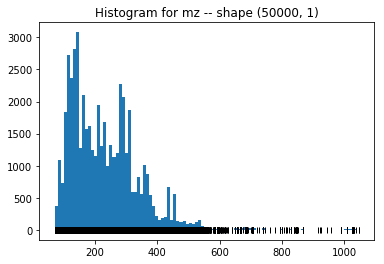

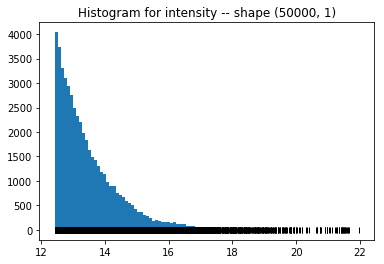

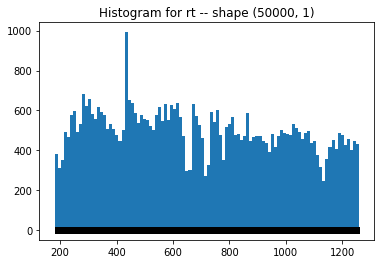

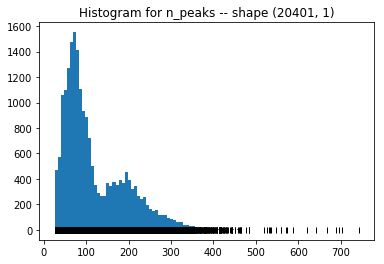

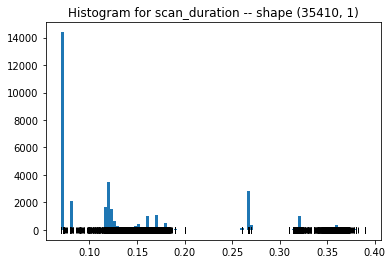

In [10]:
data_types = [MZ, INTENSITY, RT, N_PEAKS, SCAN_DURATION]
filename = None
ms_level = 1

for data_type in data_types:
    X = ds.get_data(data_type, filename, ms_level, min_intensity=min_ms1_intensity, min_rt=min_rt, max_rt=max_rt, 
                    max_data=max_data)
    if data_type == INTENSITY:
        ds.plot_histogram(np.log(X), data_type)
    else:
        ds.plot_histogram(X, data_type)        

### 2. Train ms1 densities

In [11]:
filename = None
ms_level = 1

In [12]:
densities = DensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)

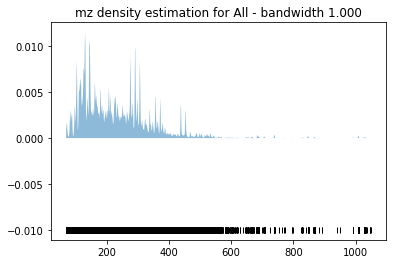

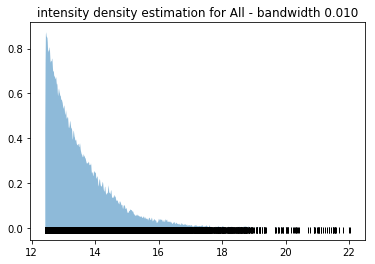

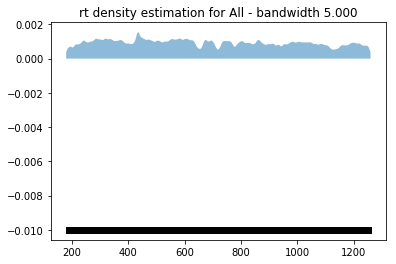

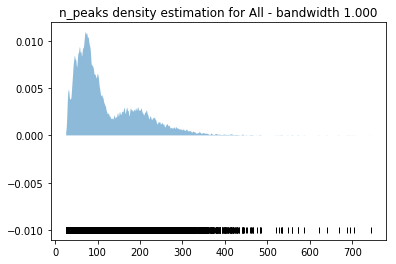

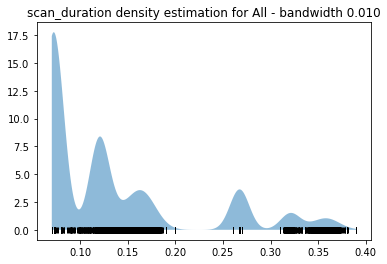

In [13]:
densities.kde(ds, filename, ms_level, bandwidth_mz=1.0, bandwidth_intensity=0.01, 
              bandwidth_rt=5.0, bandwidth_n_peaks=1.0, bandwidth_scan_durations=0.01, max_data=max_data)

In [14]:
densities.sample(ms_level, 10)

array([[ 153.54682432,   12.67714937,  962.55118718],
       [ 217.35636462,   13.11307978,  819.3748171 ],
       [ 254.04243794,   14.01406981,  684.85154387],
       [ 113.05823136,   12.5617052 , 1145.20055371],
       [ 229.49581633,   13.39651592,  903.09956833],
       [ 685.82875857,   13.31241493, 1134.45031053],
       [ 207.29437248,   14.94872461, 1130.56802615],
       [ 275.20362758,   15.21379744,  738.79389803],
       [ 539.20174581,   12.68919333, 1177.93236831],
       [ 265.32895314,   14.91842452, 1255.73342336]])

In [15]:
densities.n_peaks(ms_level, 10)

array([[237.43445154],
       [264.35807031],
       [202.86507192],
       [156.92351236],
       [ 67.74014057],
       [289.92837578],
       [ 50.12430167],
       [ 85.25326946],
       [ 66.16529185],
       [194.43929806]])

In [16]:
densities.scan_durations(ms_level, 10)

array([[0.25789462],
       [0.13361083],
       [0.11605815],
       [0.12925445],
       [0.11606011],
       [0.37107249],
       [0.26260107],
       [0.16563737],
       [0.08621441],
       [0.11423097]])

### 3. Train ms2 densities

In [17]:
ms_level = 2

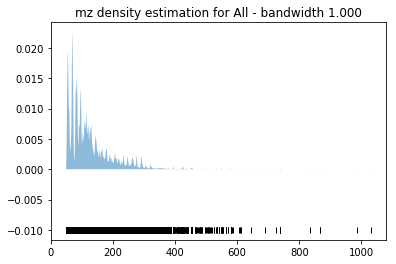

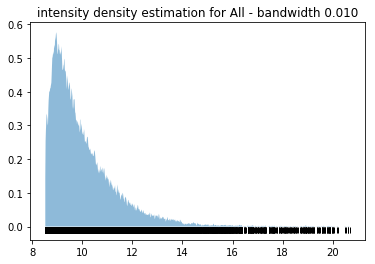

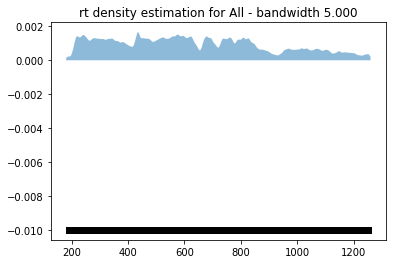

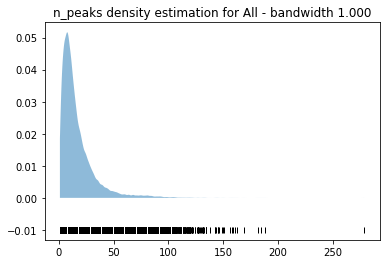

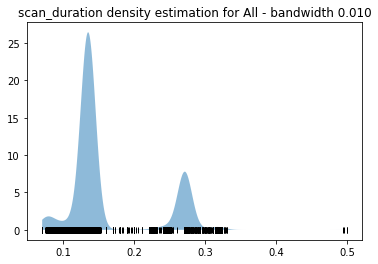

In [18]:
densities.kde(ds, filename, ms_level, bandwidth_mz=1.0, bandwidth_intensity=0.01, 
              bandwidth_rt=5.0, bandwidth_n_peaks=1.0, bandwidth_scan_durations=0.01, max_data=max_data)

### 4. Alternative KDE where we fit the m/z and intensity together

For beer1pos only

In [19]:
filename = 'Beer_multibeers_1_T10_POS.mzML'

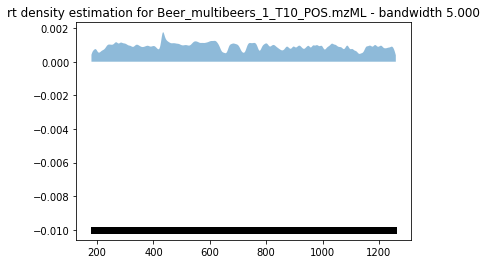

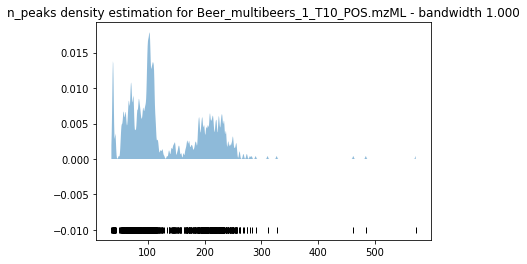

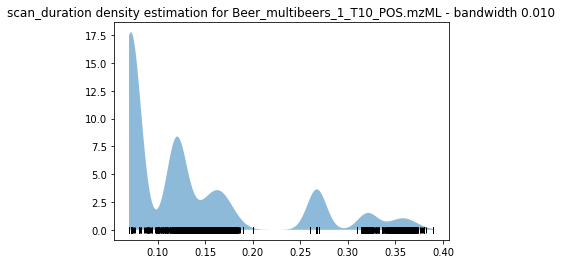

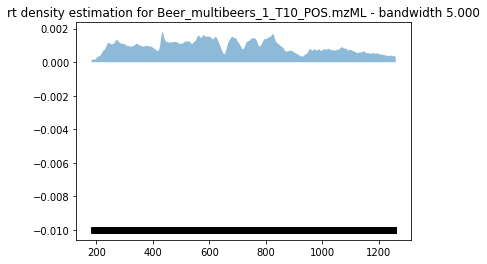

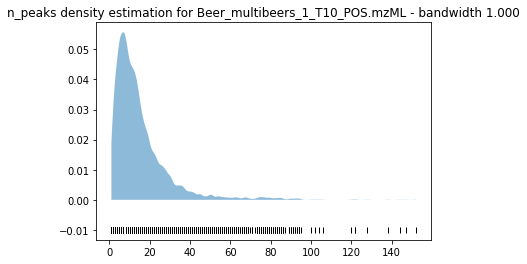

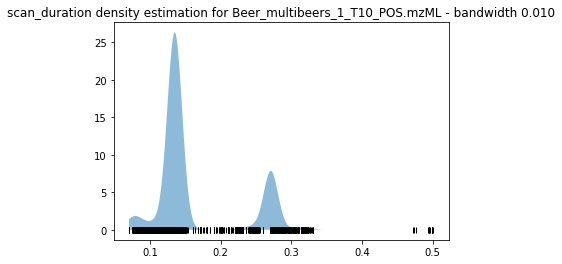

In [20]:
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds, filename, 2, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [21]:
densities.sample(1, 10)

array([[ 167.10871477,   18.57239917,  685.37731346],
       [ 143.29662378,   14.13822328,  926.7813066 ],
       [ 226.16744114,   12.56622733,  545.21490942],
       [ 199.40239551,   15.55698713,  520.41424654],
       [ 278.72587439,   17.02188923, 1213.41981502],
       [ 125.8661425 ,   13.12291484,  552.32537458],
       [ 171.64204219,   14.20313793,  589.57833042],
       [ 372.69708052,   15.00428541,  817.21834588],
       [ 305.5877772 ,   14.7455969 ,  617.81077785],
       [ 296.31555189,   15.59053272, 1226.69835588]])

In [22]:
densities.n_peaks(1, 10)

array([[224.93698668],
       [ 89.64666479],
       [120.31054668],
       [234.56028713],
       [ 90.83774651],
       [166.59524871],
       [ 92.83016358],
       [105.25583667],
       [ 79.71582569],
       [223.19354077]])

In [23]:
densities.scan_durations(1, 10)

array([[0.05777265],
       [0.11302839],
       [0.26310758],
       [0.09432977],
       [0.08885196],
       [0.12669379],
       [0.05685305],
       [0.26717772],
       [0.06553297],
       [0.16390054]])

In [24]:
densities.sample(2, 10)

array([[100.44812821,  10.97286894, 730.16622048],
       [ 64.47325553,   9.86539   , 256.35194213],
       [164.17846744,  10.21439541, 250.27326141],
       [ 82.96853288,  10.71130294, 515.66262875],
       [ 88.77817007,   8.67241075, 659.67557863],
       [ 95.9396964 ,   8.42711854, 983.07460752],
       [ 52.36509054,   9.74220921, 537.91506331],
       [177.69259761,   8.51161882, 246.94111318],
       [131.15656379,   6.98502417, 208.93368288],
       [122.78462126,  11.32036982, 676.72710328]])

In [25]:
densities.n_peaks(2, 10)

array([[ 6.90338157],
       [ 6.54110711],
       [ 3.14770707],
       [ 5.40880591],
       [25.05712857],
       [ 5.75026624],
       [21.21197685],
       [22.88265071],
       [ 3.48062635],
       [11.4070594 ]])

In [26]:
densities.scan_durations(2, 10)

array([[0.1143108 ],
       [0.14174199],
       [0.08879568],
       [0.14223752],
       [0.15513358],
       [0.28165167],
       [0.09830256],
       [0.12131773],
       [0.13366282],
       [0.26904051]])

In [27]:
ps = PeakSampler(densities)

In [28]:
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_beer1pos.p')

In [29]:
ps = load_obj('C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_beer1pos.p')

In [30]:
ps.sample(ms_level=1, min_mz=100, max_mz=200, min_rt=100, max_rt=200, min_intensity=1e5)

[Peak mz=105.3274 rt=195.01 intensity=9810900.21 ms_level=1,
 Peak mz=166.7628 rt=196.38 intensity=886144.29 ms_level=1,
 Peak mz=130.3113 rt=193.25 intensity=157396.73 ms_level=1,
 Peak mz=198.5655 rt=176.69 intensity=374306.72 ms_level=1,
 Peak mz=120.2876 rt=198.07 intensity=309271.01 ms_level=1,
 Peak mz=185.7221 rt=180.08 intensity=542164.29 ms_level=1,
 Peak mz=100.5320 rt=195.00 intensity=346401.56 ms_level=1,
 Peak mz=190.3062 rt=190.66 intensity=685424.85 ms_level=1,
 Peak mz=111.9448 rt=187.03 intensity=475616.43 ms_level=1,
 Peak mz=159.3142 rt=188.16 intensity=6397778.41 ms_level=1,
 Peak mz=155.7405 rt=185.17 intensity=1715663.68 ms_level=1,
 Peak mz=119.0876 rt=177.11 intensity=134667432.09 ms_level=1,
 Peak mz=196.0614 rt=189.46 intensity=623327.47 ms_level=1,
 Peak mz=183.5369 rt=190.05 intensity=515214.96 ms_level=1,
 Peak mz=130.6381 rt=177.40 intensity=874321.68 ms_level=1,
 Peak mz=179.1201 rt=191.45 intensity=1814099.52 ms_level=1,
 Peak mz=110.4503 rt=191.19 inten

In [31]:
ps.sample(ms_level=1, n_peaks=10)

[Peak mz=95.7424 rt=589.76 intensity=919500.39 ms_level=1,
 Peak mz=138.5085 rt=1205.07 intensity=390278.20 ms_level=1,
 Peak mz=216.4024 rt=510.55 intensity=205014.89 ms_level=1,
 Peak mz=306.3253 rt=768.32 intensity=7459577.89 ms_level=1,
 Peak mz=197.9549 rt=964.07 intensity=1585817.23 ms_level=1,
 Peak mz=224.3085 rt=1238.40 intensity=1548010.85 ms_level=1,
 Peak mz=525.7809 rt=830.02 intensity=1194237.70 ms_level=1,
 Peak mz=129.6226 rt=1148.13 intensity=233025.78 ms_level=1,
 Peak mz=188.0191 rt=437.68 intensity=327998.72 ms_level=1,
 Peak mz=119.7603 rt=583.21 intensity=936973.16 ms_level=1]

In [32]:
ps.sample(ms_level=2)

[Peak mz=105.2551 rt=726.93 intensity=16002.84 ms_level=2,
 Peak mz=81.6783 rt=910.71 intensity=3073.94 ms_level=2]

In [33]:
ps.sample(ms_level=2, n_peaks=10)

[Peak mz=84.6774 rt=1009.52 intensity=37856.29 ms_level=2,
 Peak mz=81.9895 rt=705.67 intensity=5735.39 ms_level=2,
 Peak mz=72.2481 rt=838.75 intensity=5304400.28 ms_level=2,
 Peak mz=144.0533 rt=1198.32 intensity=24038.08 ms_level=2,
 Peak mz=106.4070 rt=1081.42 intensity=140106.58 ms_level=2,
 Peak mz=80.9390 rt=692.72 intensity=18791.98 ms_level=2,
 Peak mz=80.8704 rt=589.07 intensity=32273.74 ms_level=2,
 Peak mz=182.3240 rt=1164.29 intensity=5174014.66 ms_level=2,
 Peak mz=104.6538 rt=441.12 intensity=3630.02 ms_level=2,
 Peak mz=116.3365 rt=804.32 intensity=1833692.39 ms_level=2]

### 5. Train on all the 19 beers

In [34]:
filename = None

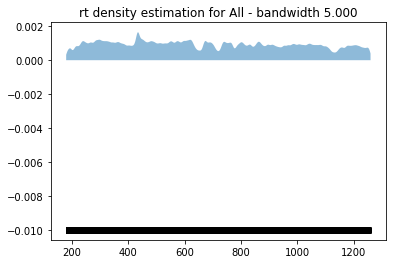

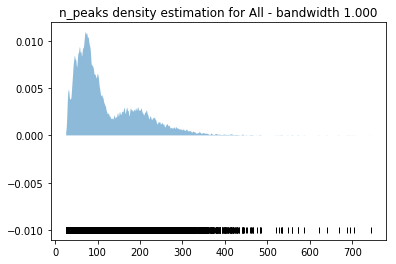

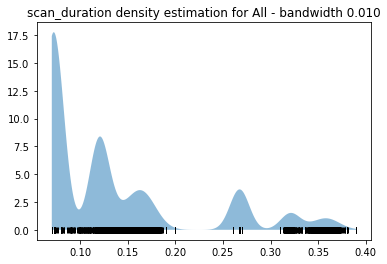

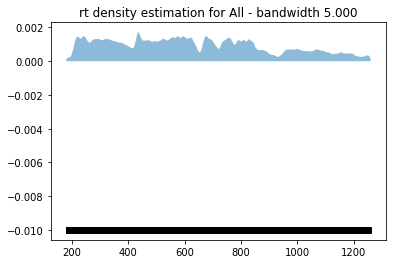

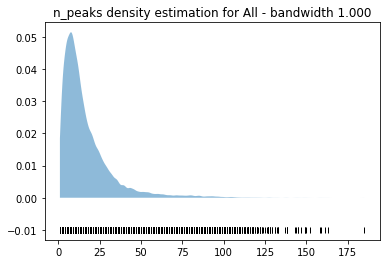

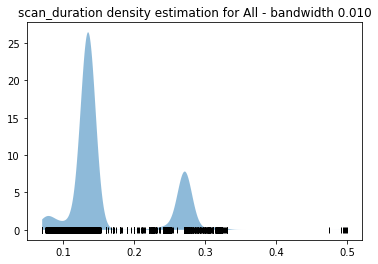

In [35]:
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0, max_data=max_data)
densities.kde(ds, filename, 2, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0, max_data=max_data)

In [36]:
densities.sample(1, 10)

array([[ 245.6604295 ,   12.64012762,  737.7491946 ],
       [ 858.07387595,   13.19742569,  333.00202131],
       [ 143.0374319 ,   15.68073783,  894.14368536],
       [ 241.31841253,   13.43435823,  926.23727082],
       [ 166.59126925,   13.74973358, 1088.60971398],
       [ 116.78764786,   16.0068093 , 1107.65191807],
       [ 358.08525013,   15.03225573,  648.11735016],
       [ 178.63376991,   14.18405394,  844.58083156],
       [ 114.73284416,   14.18339709,  766.05551009],
       [ 292.81622727,   14.19612113, 1027.42654806]])

In [37]:
densities.n_peaks(1, 10)

array([[ 81.40927851],
       [ 48.43811577],
       [ 60.05030495],
       [ 47.23001392],
       [ 91.19187295],
       [109.80146599],
       [ 92.55707228],
       [ 85.51543297],
       [212.13979554],
       [114.13203824]])

In [38]:
densities.scan_durations(1, 10)

array([[0.25556353],
       [0.18958372],
       [0.06807167],
       [0.07193972],
       [0.13129298],
       [0.12444509],
       [0.06130568],
       [0.07007682],
       [0.07141477],
       [0.27582539]])

In [39]:
densities.sample(2, 10)

array([[  67.00561804,   11.69088525,  278.12084885],
       [  78.25958053,    7.79705834,  770.05573069],
       [  93.40676204,    8.91564201,  483.54263272],
       [ 262.59340954,    8.65827102,  414.93369315],
       [  57.44372678,   11.12839591,  334.29611966],
       [  94.80923304,   10.97543601,  806.44573354],
       [  77.20629785,   11.90540295,  323.42225396],
       [  88.66065094,    9.26423454,  212.546252  ],
       [ 259.14176855,    8.64490281,  720.63781142],
       [ 143.6980686 ,   10.84960925, 1189.15263762]])

In [40]:
densities.n_peaks(2, 10)

array([[28.51328338],
       [17.02673741],
       [ 3.33579687],
       [25.62578527],
       [ 9.0875029 ],
       [33.87021638],
       [37.81696224],
       [15.07992458],
       [19.05891304],
       [ 9.74553008]])

In [41]:
densities.scan_durations(2, 10)

array([[0.14359662],
       [0.14006051],
       [0.14164678],
       [0.1462876 ],
       [0.27685385],
       [0.06663782],
       [0.17108503],
       [0.13048739],
       [0.14252971],
       [0.14313261]])

In [42]:
ps = PeakSampler(densities)

In [43]:
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_19_beers.p')

In [44]:
ps = load_obj('C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_19_beers.p')

In [45]:
ps.sample(ms_level=1, min_mz=100, max_mz=200, min_rt=100, max_rt=200, min_intensity=1e5)

[Peak mz=131.2999 rt=191.28 intensity=1553750.19 ms_level=1,
 Peak mz=143.7573 rt=197.37 intensity=19497122.67 ms_level=1,
 Peak mz=157.7394 rt=188.53 intensity=1326906.48 ms_level=1,
 Peak mz=190.9138 rt=181.71 intensity=421344337.68 ms_level=1,
 Peak mz=176.7132 rt=189.96 intensity=529352.88 ms_level=1,
 Peak mz=143.9254 rt=195.10 intensity=2139223.59 ms_level=1,
 Peak mz=103.3896 rt=177.38 intensity=438078.01 ms_level=1,
 Peak mz=168.4701 rt=194.41 intensity=712742.30 ms_level=1,
 Peak mz=133.4840 rt=192.64 intensity=2708459.84 ms_level=1,
 Peak mz=103.8811 rt=194.91 intensity=125922.81 ms_level=1,
 Peak mz=149.2151 rt=192.91 intensity=1818437.82 ms_level=1,
 Peak mz=105.9775 rt=187.69 intensity=157790.61 ms_level=1,
 Peak mz=159.6546 rt=190.23 intensity=329877.69 ms_level=1,
 Peak mz=180.1301 rt=188.76 intensity=785366.56 ms_level=1,
 Peak mz=129.5064 rt=189.63 intensity=345837.29 ms_level=1,
 Peak mz=145.7205 rt=195.90 intensity=198838.11 ms_level=1,
 Peak mz=140.3925 rt=192.12 in

In [46]:
ps.sample(ms_level=1, n_peaks=10)

[Peak mz=263.4046 rt=300.45 intensity=3679364.44 ms_level=1,
 Peak mz=207.8090 rt=237.52 intensity=1629552.31 ms_level=1,
 Peak mz=437.6111 rt=935.06 intensity=369504.94 ms_level=1,
 Peak mz=292.5529 rt=310.67 intensity=693692.54 ms_level=1,
 Peak mz=354.6397 rt=1105.37 intensity=384938.53 ms_level=1,
 Peak mz=279.9890 rt=693.05 intensity=372244.21 ms_level=1,
 Peak mz=337.3944 rt=735.82 intensity=637104.40 ms_level=1,
 Peak mz=456.7623 rt=525.90 intensity=179111.35 ms_level=1,
 Peak mz=564.2221 rt=349.92 intensity=169145.55 ms_level=1,
 Peak mz=283.5593 rt=368.30 intensity=2777707.31 ms_level=1]

In [47]:
ps.sample(ms_level=2)

[Peak mz=74.7324 rt=474.62 intensity=62006.63 ms_level=2,
 Peak mz=59.7842 rt=443.05 intensity=10592.89 ms_level=2,
 Peak mz=82.4372 rt=707.70 intensity=6749.35 ms_level=2,
 Peak mz=89.6605 rt=393.70 intensity=17809.57 ms_level=2,
 Peak mz=139.7261 rt=472.85 intensity=13495.82 ms_level=2,
 Peak mz=137.6417 rt=600.54 intensity=8065.99 ms_level=2,
 Peak mz=86.6155 rt=779.86 intensity=1786960.75 ms_level=2,
 Peak mz=100.4370 rt=1207.81 intensity=12616.85 ms_level=2,
 Peak mz=182.9591 rt=830.98 intensity=7024.02 ms_level=2,
 Peak mz=252.3549 rt=283.65 intensity=18302.07 ms_level=2]

In [48]:
ps.sample(ms_level=2, n_peaks=10)

[Peak mz=95.3576 rt=942.40 intensity=9188.70 ms_level=2,
 Peak mz=126.5166 rt=428.92 intensity=5587.42 ms_level=2,
 Peak mz=69.9322 rt=665.26 intensity=744726.19 ms_level=2,
 Peak mz=95.7522 rt=581.33 intensity=28813.19 ms_level=2,
 Peak mz=87.3567 rt=693.02 intensity=82648.44 ms_level=2,
 Peak mz=64.7519 rt=212.92 intensity=7608.65 ms_level=2,
 Peak mz=220.8718 rt=687.37 intensity=27835.82 ms_level=2,
 Peak mz=54.7728 rt=463.78 intensity=28626.98 ms_level=2,
 Peak mz=52.9316 rt=750.49 intensity=17436.67 ms_level=2,
 Peak mz=71.1172 rt=377.54 intensity=207782.04 ms_level=2]

### 6. Train on Justin's Urine Data

In [49]:
# ds = DataSource(min_ms1_intensity=2E5, min_ms2_intensity=5000, min_rt=3*60, max_rt=21*60, min_sn=100)
# ds.load_data('C:\\Users\\joewa\\Work\\docs\\clms\\Urines100Study_mzml_files_peaklist\\mzml_files')

In [50]:
# densities = PeakDensityEstimator()
# densities.kde(ds, 1, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
# densities.kde(ds, 2, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [51]:
# ps = PeakSampler(densities)
# save_obj(ps, '../models/peak_sampler_100_urines.p')

In [52]:
# ps = load_obj('../models/peak_sampler_100_urines.p')

In [53]:
# ps.sample(ms_level=1)

In [54]:
# ps.sample(ms_level=2)